#### Vivian Xia

## Implement a Quicksort Algorithm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

import random
from string import ascii_letters

from tabulate import tabulate

In [ ]:
def quicksort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)

In [ ]:
def gnomeSort( arr, n):
	index = 0
	while index < n:
		if index == 0:
			index = index + 1
		if arr[index] >= arr[index - 1]:
			index = index + 1
		else:
			arr[index], arr[index-1] = arr[index-1], arr[index]
			index = index - 1

	return arr

In [ ]:
def cycleSort(array):
  writes = 0
   
  # Loop through the array to find cycles to rotate.
  for cycleStart in range(0, len(array) - 1):
    item = array[cycleStart]
     
    # Find where to put the item.
    pos = cycleStart
    for i in range(cycleStart + 1, len(array)):
      if array[i] < item:
        pos += 1
     
    # If the item is already there, this is not a cycle.
    if pos == cycleStart:
      continue
     
    # Otherwise, put the item there or right after any duplicates.
    while item == array[pos]:
      pos += 1
    array[pos], item = item, array[pos]
    writes += 1
     
    # Rotate the rest of the cycle.
    while pos != cycleStart:
       
      # Find where to put the item.
      pos = cycleStart
      for i in range(cycleStart + 1, len(array)):
        if array[i] < item:
          pos += 1
       
      # Put the item there or right after any duplicates.
      while item == array[pos]:
        pos += 1
      array[pos], item = item, array[pos]
      writes += 1
   
  return writes

In [ ]:
def generate_list(len):
  """ Generate List Algorithm.
    
  Generate a list composed of 50 character strings.
    
  Parameters
  ----------
  len: length that is generated in the array.
    
  """
  np.random.seed(12345)
  list_string = []

  for string in range(len):
    string = ''.join(random.choice(ascii_letters) for i in range(50)) #random 50 character string
    list_string.append(string)
  
  return list_string

In [ ]:
def sort_times(list_string):
  """ Sort Times Algorithm.
    
  Time the quicksort, gnome sort, and cycle sort for a list.
    
  Parameters
  ----------
  list_string: list of strings that are sorted.
    
  """

  #quicksort
  start_time = time.perf_counter()
  quicksort(list_string)
  end_time = time.perf_counter()
  quicksort_time = end_time - start_time

  #gnome sort
  start_time = time.perf_counter()
  gnomeSort(list_string, len(list_string))
  end_time = time.perf_counter()
  gnomesort_time = end_time - start_time

  #cycle sort
  start_time = time.perf_counter()
  cycleSort(list_string)
  end_time = time.perf_counter()
  cycle_time = end_time - start_time

  return len(list_string), quicksort_time, gnomesort_time, cycle_time

In [ ]:
time_list = []

list_string = generate_list(200)
time_list.append(sort_times(list_string))

list_string = generate_list(400)
time_list.append(sort_times(list_string))

list_string = generate_list(600)
time_list.append(sort_times(list_string))

list_string = generate_list(800)
time_list.append(sort_times(list_string))

list_string = generate_list(1000)
time_list.append(sort_times(list_string))

I would have put the above code block into a loop but faced a type error from the quicksort function line pertaining to len(). 

In [ ]:
col_names = ["Array Length","Quicksort","Gnome sort","Cycle sort"]

print(tabulate(time_list, headers=col_names, tablefmt="fancy_grid"))

╒════════════════╤═════════════╤══════════════╤══════════════╕
│   Array Length │   Quicksort │   Gnome sort │   Cycle sort │
╞════════════════╪═════════════╪══════════════╪══════════════╡
│            200 │  0.00093595 │    0.0095466 │   0.00269165 │
├────────────────┼─────────────┼──────────────┼──────────────┤
│            400 │  0.00120281 │    0.0300803 │   0.00696193 │
├────────────────┼─────────────┼──────────────┼──────────────┤
│            600 │  0.00158766 │    0.0669763 │   0.0173566  │
├────────────────┼─────────────┼──────────────┼──────────────┤
│            800 │  0.00219677 │    0.106104  │   0.0346237  │
├────────────────┼─────────────┼──────────────┼──────────────┤
│           1000 │  0.0048313  │    0.26269   │   0.0426104  │
╘════════════════╧═════════════╧══════════════╧══════════════╛


In [ ]:
df = pd.DataFrame(time_list) #create a dataframe of the list of times
df.columns = col_names
df.head()

,Array Length,Quicksort,Gnome sort,Cycle sort
0,200,0.000936,0.009547,0.002692
1,400,0.001203,0.030080,0.006962
2,600,0.001588,0.066976,0.017357
3,800,0.002197,0.106104,0.034624
4,1000,0.004831,0.262690,0.042610


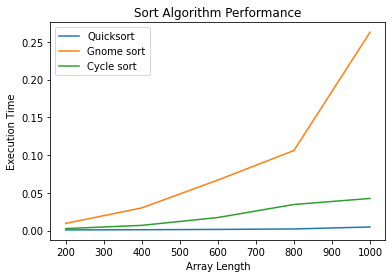

In [ ]:
plt.plot(df['Array Length'], df['Quicksort'], label = 'Quicksort')
plt.plot(df['Array Length'], df['Gnome sort'], label = 'Gnome sort')
plt.plot(df['Array Length'], df['Cycle sort'], label = 'Cycle sort')

plt.title('Sort Algorithm Performance')
plt.xlabel('Array Length')
plt.ylabel('Execution Time')
plt.legend()

plt.show()

A list of random 50 character strings with lengths of 200, 400, 600, 800, and 10000 were generated. The length of each list differ by a multiple of 200. Three sorting algorithms and these five lists are compared. 

The quicksort algorithm uses the technique of divide and conquer. It sorts each list by taking the first element as the pivot. The array is then split into two sub-arrays. One sub-array is made up of the strings less than the pivot and the other sub-array is made up of the strings greater than the pivot. If there is more than one string, the algorithm continues to split the sub-arrays further as the recursive case dictates until it reaches the base case. The base case is when there are less than two strings in the array. The time complexity for the quicksort varies depending on the pivot, but the worst case is O(n^2). However, its average case is O(n log n). 

The gnome sort algorithm sorts each element in the list by iterating through each pair of strings and comparing those two to see if they are in the right order. If not, the two strings swap positions. Once the first and second strings are compared, then the second and third are compared and so on. If the second and third swapped positions, then the first and new second element are to be compared again before moving on to the next pair. This algorithm has a time complexity of O(n^2). 

The cycle sort algorithm loops through each array to find cycles to rotate the elements, starting with the first element. Each element within the cycle is rotated forward so that the elements in the current cycle end up in its right position. The time complexity for the cycle sort is also O(n^2). This time complexity is for all cases including the worst, best, and average. 

Despite the fact that these three algorithms have the same worst case time complexity, it can be seen from the table and graph that the quicksort algorithm scales much better than the other two. The quicksort takes on its average time complexity of O(n log n). This can be seen by the consistently low execution time despite the increasing lengths of each list. From the graph, it can be seen that the cycle sort scales worse than the quicksort but better than the gnome sort. The cycle sort graph does start to curve up as the list length increases. The rate that it is sorting at increases. The gnome sort scales the worst among the three sorts. The gnome sort increases at a faster rate than the cycle sort as seen by the way the gnome sort graph more steeply increases compared to the cycle sort. As the load increases, the run time's rate will continue to increase the most with gnome sort then cycle sort, compromising the performance. However, the quick sort will be able to scale with the larger load and continue with efficient run times. 